In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm # this imports different "color maps" for use on contour plots
from scipy import optimize
%matplotlib notebook

# Calibration

### Day 1: Si (d=1.14) and Si (d=.315)

In [2]:
wave1, zero1, dzero1, hun1, dhun1 = np.loadtxt('day1_calib.txt', unpack= True, skiprows =3)

### Day 2: Si (d=2.09), Ge (d=1.11) and GaAs (d=.002) 

In [3]:
wave2, zero2, dzero2, hun2, dhun2 = np.loadtxt('day2_calib.txt', unpack = True, skiprows = 3)

## Combine 

In [4]:
wave = np.concatenate((wave1,wave2))
zero = np.concatenate((zero1, zero2))
dzero = np.concatenate((dzero1, dzero2))
hun = np.concatenate((hun1, hun2))
dhun = np.concatenate((dhun1, dhun2))

In [5]:
#weights
w0 = 1/dzero**2
W0 = np.sum(w0)
dV_0 = np.sqrt(1/W0)

w100 = 1/dhun**2
W100 = np.sum(w100)
dV_100 = np.sqrt(1/W100)

print(dV_0, dV_100)

0.0040254265963 0.0119599313562


In [6]:
#weighted average reference voltages
V_0 = np.sum(zero*w0)/W0
V_100 = np.sum(hun*w100)/W100

print(V_0, V_100)

0.634757148857 24.5627738435


<IPython.core.display.Javascript object>


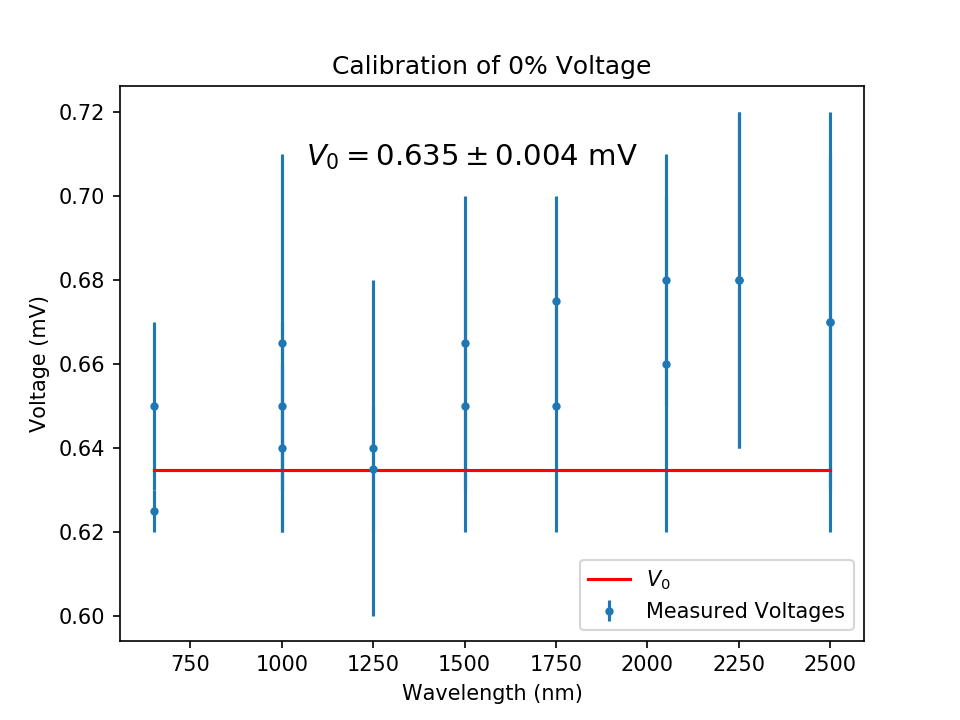

In [7]:
fig0 = plt.figure()
ax = fig0.add_subplot(111)
ax.errorbar(wave, zero, dzero, fmt = '.', label = 'Measured Voltages')

X = np.linspace(wave.min(), wave.max(), 100)
ax.plot(X, V_0*np.ones(len(X)), 'r', label ='$V_0$')

ax.set_title('Calibration of 0% Voltage')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Voltage (mV)')
ax.legend(loc='lower right')

textfit = '$V_0 = %.3f \\pm %.3f$ mV \n' \
            %(V_0, dV_0)
        
ax.text(0.25, 0.9, textfit, transform=ax.transAxes, fontsize=14,
         verticalalignment='top')

plt.savefig('cal0.pdf')

<IPython.core.display.Javascript object>


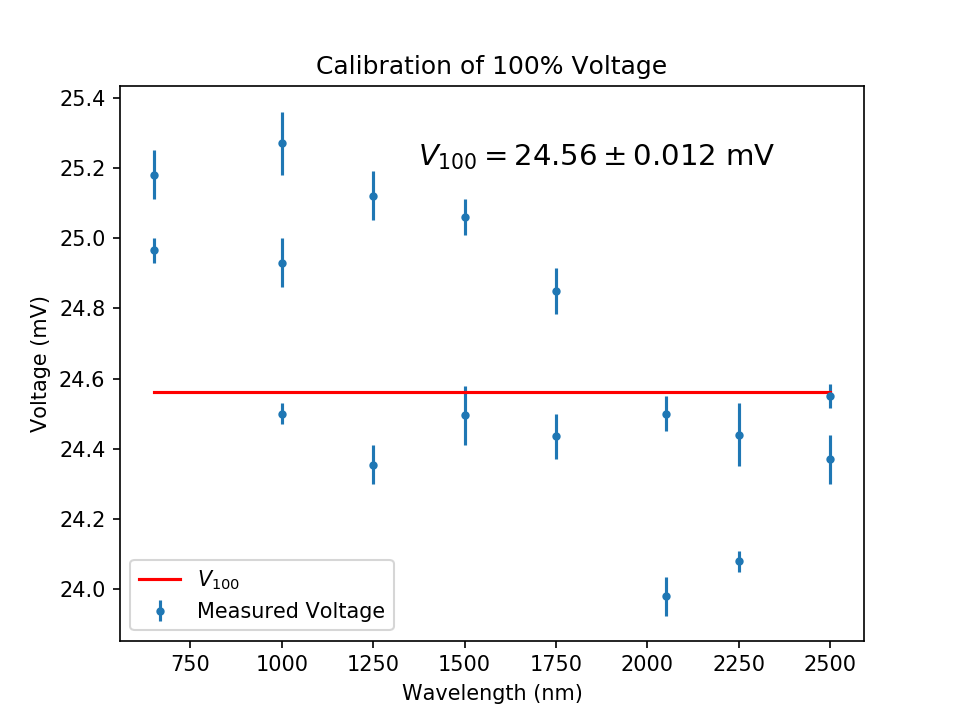

In [8]:
fig100 =plt.figure()
ax = fig100.add_subplot(111)
ax.errorbar(wave, hun, dhun, fmt = '.', label = 'Measured Voltage')

X = np.linspace(wave.min(), wave.max(), 100)
ax.plot(X, V_100*np.ones(100), 'r', label='$V_{100}$')

ax.set_title('Calibration of 100% Voltage')
ax.set_ylabel('Voltage (mV)')
ax.set_xlabel('Wavelength (nm)')
ax.legend(loc='lower left')

textfit = '$V_{100} = %.2f \\pm %.3f$ mV \n' \
            %(V_100, dV_100)
    
ax.text(0.4, 0.9, textfit, transform=ax.transAxes, fontsize=14,
         verticalalignment='top')

plt.savefig('cal100.pdf')

In [9]:
#planck's constant times speed of light
hc = 1239.842 #units of eVnm 

# T is transmittance, E is energy of photon
#dV114=.08, dV315=.05, dV209=.7, dVGe=.08, dVGaAs=.3 (mV)
d = dV_100/(V_100-V_0)

#Si(1.14)
wave114, V114 = np.loadtxt('Si(1_14).txt', unpack=True, skiprows=3)
T114 = 100*(V114-V_0)/(V_100-V_0)
E114 = hc/wave114

dT114 = T114*np.sqrt((.08/(V114-V_0))**2 + d**2)


#Si (.315)
wave315, V315 =np.loadtxt('Si(0_315).txt', unpack=True, skiprows=3)
T315 = 100*(V315-V_0)/(V_100-V_0)
E315 = hc/wave315

dT315 = T315*np.sqrt(d**2+(.05/(V315-V_0))**2)

#Si (2.09)
wave209, V209 = np.loadtxt('Si(2_09).txt', unpack=True, skiprows=3)
T209 = 100*(V209-V_0)/(V_100-V_0)
E209 = hc/wave209

dT209 = T209*np.sqrt(d**2 + (.7/(V209-V_0))**2)

#Ge
waveGe, VGe = np.loadtxt('Ge.txt', unpack =True, skiprows=3)
TGe = 100*(VGe-V_0)/(V_100-V_0)
EGe = hc/waveGe

dTGe = TGe*np.sqrt(d**2 + (.08/(VGe-V_0))**2)

#GaAs
waveGaAs, VGaAs = np.loadtxt('GaAs.txt', unpack = True, skiprows=3)
TGaAs = 100*(VGaAs-V_0)/(V_100-V_0)
EGaAs = hc/waveGaAs

dTGaAs = TGaAs*np.sqrt(d**2 + (.3/(VGaAs-V_0))**2)

<IPython.core.display.Javascript object>


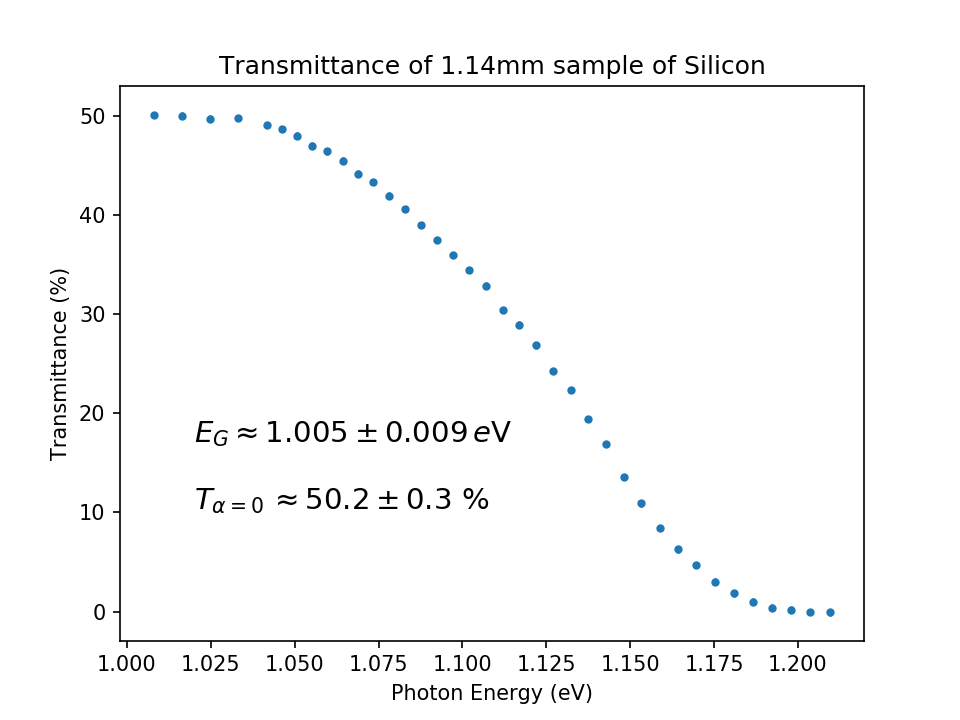

In [10]:
fig114 = plt.figure()
ax = fig114.add_subplot(111)
ax.errorbar(E114, T114, dT114, fmt='.')

ax.set_xlabel('Photon Energy (eV)')
ax.set_ylabel('Transmittance (%)')
ax.set_title('Transmittance of 1.14mm sample of Silicon')


textfit = '$E_G \\approx 1.005 \pm 0.009\,e$V \n \n'\
          '$T_{\\alpha=0} \,\\approx 50.2\pm 0.3$ %'

ax.text(0.1, 0.4, textfit, transform=ax.transAxes, fontsize=14,
         verticalalignment='top')

plt.savefig('T114.png')
#E_band = 1.055 pm .009 eV

<IPython.core.display.Javascript object>


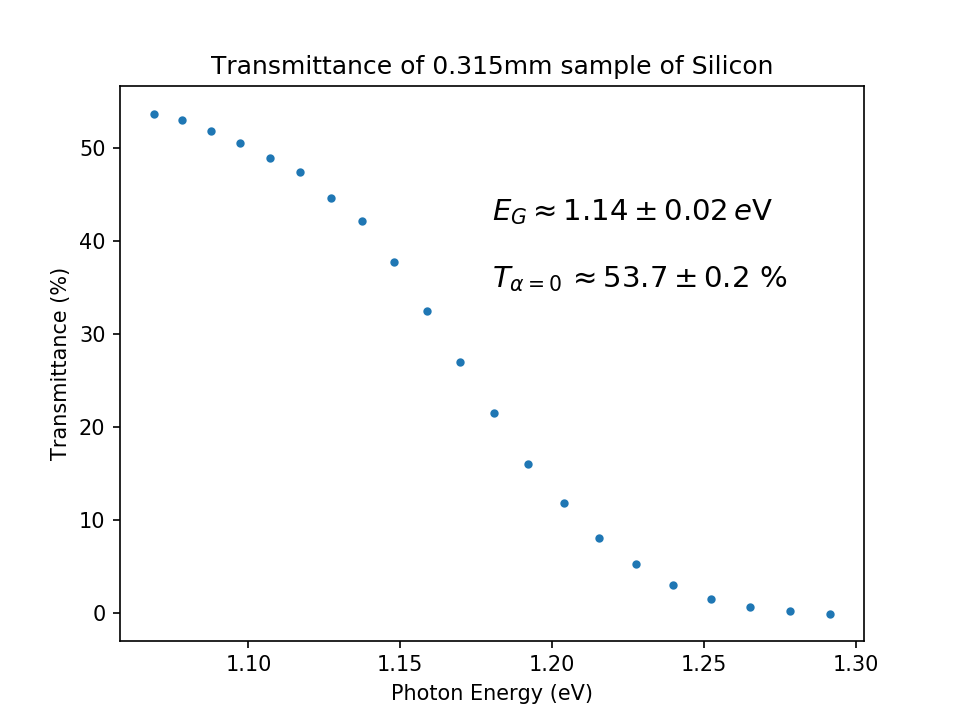

In [11]:
fig315 = plt.figure()
ax = fig315.add_subplot(111)
ax.errorbar(E315, T315, dT315, fmt='.')

ax.set_xlabel('Photon Energy (eV)')
ax.set_ylabel('Transmittance (%)')
ax.set_title('Transmittance of 0.315mm sample of Silicon')

textfit = '$E_G \\approx 1.14 \pm 0.02\,e$V \n \n'\
          '$T_{\\alpha=0}\, \\approx 53.7\pm 0.2$ %'
         
          

ax.text(0.5, 0.8, textfit, transform=ax.transAxes, fontsize=14,
         verticalalignment='top')

plt.savefig('T315.png')
#E_band = 1.14 pm .02 eV

<IPython.core.display.Javascript object>


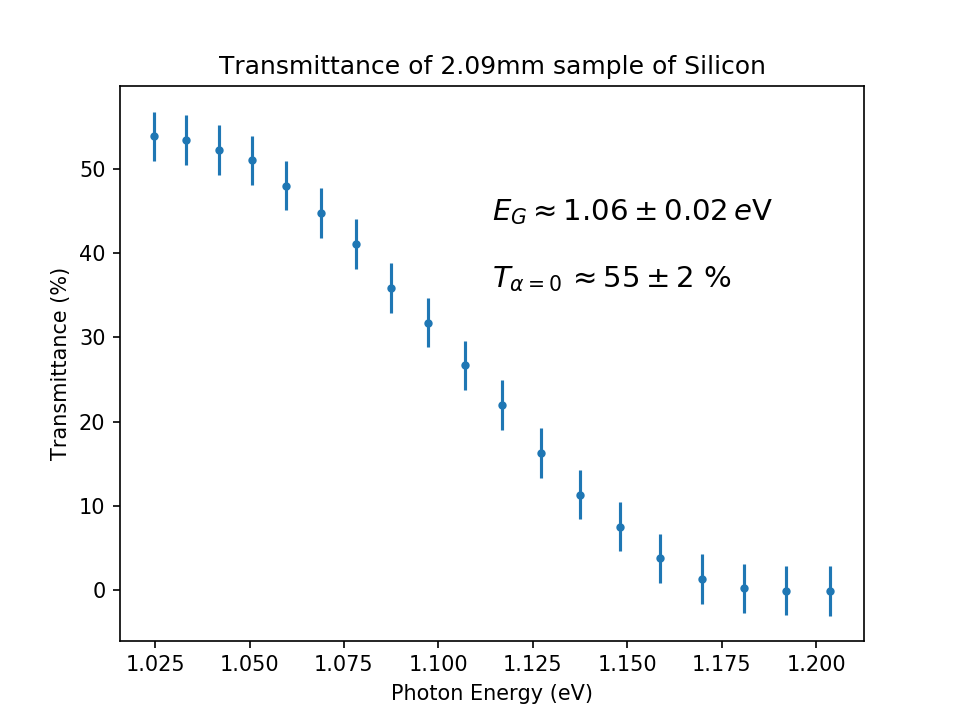

In [12]:
fig209 = plt.figure()
ax = fig209.add_subplot(111)
ax.errorbar(E209, T209, dT209, fmt='.')

ax.set_xlabel('Photon Energy (eV)')
ax.set_ylabel('Transmittance (%)')
ax.set_title('Transmittance of 2.09mm sample of Silicon')

textfit = '$E_G \\approx 1.06 \pm 0.02\,e$V \n\n'\
          '$T_{\\alpha=0} \,\\approx 55\pm 2$ %'


ax.text(0.5, 0.8, textfit, transform=ax.transAxes, fontsize=14,
         verticalalignment='top')

plt.savefig('T209.png')
#E_band = 1.06 pm .02 eV

<IPython.core.display.Javascript object>


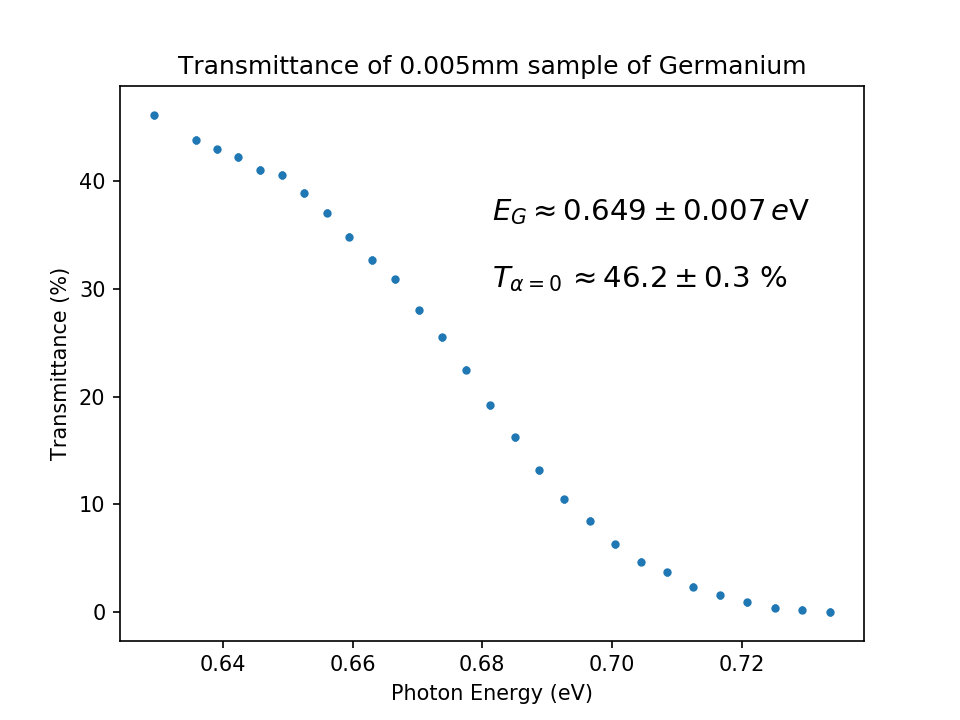

In [86]:
figGe = plt.figure()
ax = figGe.add_subplot(111)
ax.errorbar(EGe, TGe, dTGe, fmt='.')

ax.set_xlabel('Photon Energy (eV)')
ax.set_ylabel('Transmittance (%)')
ax.set_title('Transmittance of 0.005mm sample of Germanium')

textfit = '$E_G \\approx 0.649 \pm 0.007\,e$V \n\n'\
          '$T_{\\alpha=0}\, \\approx 46.2 \pm 0.3$ %'


ax.text(0.5, 0.8, textfit, transform=ax.transAxes, fontsize=14,
         verticalalignment='top')

plt.savefig('TGe.pdf')
#E_band = .649 pm .007eV

<IPython.core.display.Javascript object>


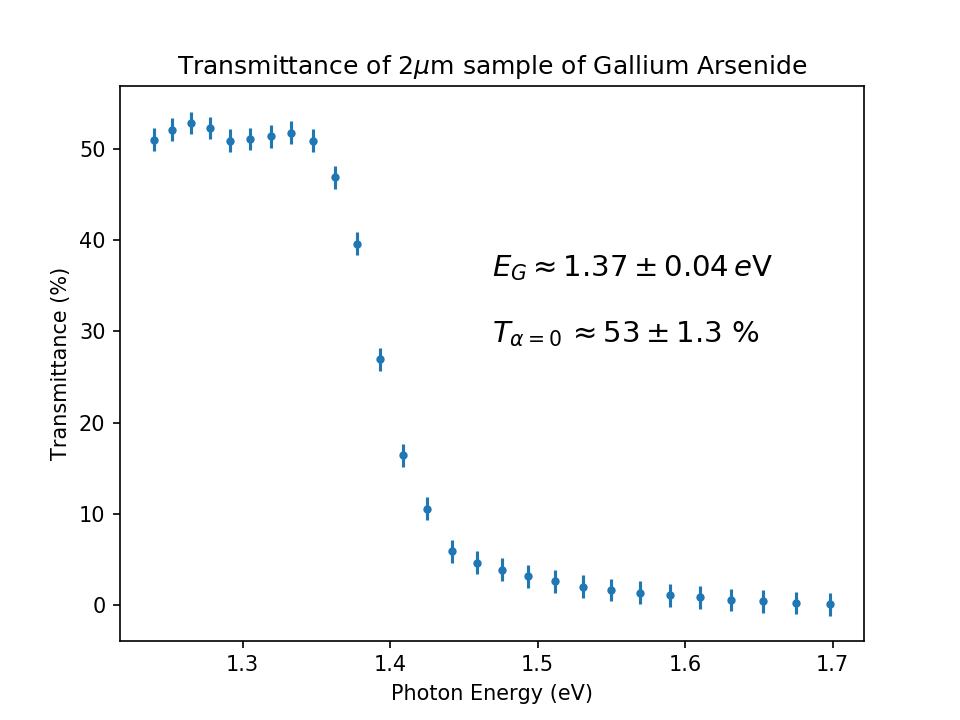

In [14]:
figGaAs = plt.figure()
ax = figGaAs.add_subplot(111)
ax.errorbar(EGaAs, TGaAs, dTGaAs, fmt='.')

ax.set_xlabel('Photon Energy (eV)')
ax.set_ylabel('Transmittance (%)')
ax.set_title('Transmittance of 2$\\mu$m sample of Gallium Arsenide')

textfit = '$E_G \\approx 1.37 \pm 0.04\,e$V \n\n'\
          '$T_{\\alpha=0}\, \\approx 53\pm 1.3$ %'


ax.text(0.5, 0.7, textfit, transform=ax.transAxes, fontsize=14,
         verticalalignment='top')

plt.savefig('TGaAs.pdf')
#E_band = 1.37 pm .04 eV

# Reflectance

In [15]:
#T_{a=0} for our samples is represented by t. Values taken from plots

t114 = 50.19
dt114 =.3

R114 = (100-t114)/(100+t114) #reflectance
dR114 = 2*dt114/(1+t114)**2
print(dR114, R114)

t315 = 53.7
dt315 = .2

R315 = (100-t315)/(100+t315)
dR315 = 2*dt315/(1+t315)**2
print(dR315,R315)

t209 = 55
dt209 =2

R209 = (100-t209)/(100+t209)
dR209 = 2*dt209/(1+t209)**2
print(dR209, R209)

tGe = 46.2
dtGe = .3

RGe = (100-tGe)/(100+tGe)
dRGe = 2*dtGe/(1+tGe)**2
print(dRGe,RGe)

tGaAs = 53
dtGaAs = 1.3

RGaAs = (100-tGaAs)/(100+tGaAs)
dRGaAs = 2*dtGaAs/(1+tGaAs)**2
print(dRGaAs, RGaAs)

0.00022897126910493337 0.3316465809974033
0.00013368581827418293 0.30123617436564737
0.0012755102040816326 0.2903225806451613
0.00026931916116058603 0.36798905608755134
0.0008916323731138546 0.30718954248366015


In [80]:
#index of refraction
n114 = (1+np.sqrt(R114))/(1-np.sqrt(R114))
dn114 = dR114/(np.sqrt(R114)*(1-np.sqrt(R114))**2)

n315 = (1+np.sqrt(R315))/(1-np.sqrt(R315))
dn315 = dR315/(np.sqrt(R315)*(1-np.sqrt(R315))**2)

n209 = (1+np.sqrt(R209))/(1-np.sqrt(R209))
dn209 = dR209/(np.sqrt(R209)*(1-np.sqrt(R209))**2)

nGe = (1+np.sqrt(RGe))/(1-np.sqrt(RGe))
dnGe = dRGe/(np.sqrt(RGe)*(1-np.sqrt(RGe))**2)

nGaAs = (1+np.sqrt(RGaAs))/(1-np.sqrt(RGaAs))
dnGaAs = dRGaAs/(np.sqrt(RGaAs)*(1-np.sqrt(RGaAs))**2)

print(n114, n315, n209, nGe, nGaAs)
print(dn114, dn315, dn209, dnGe, dnGaAs)

3.71573153171 3.43311404578 3.33666300804 4.08415568015 3.48678800284
0.00221045349778 0.00119671185602 0.011129992946 0.00286897980483 0.00809643294413


In [17]:
#function to calculate absorption coefficient
def alpha(d,R,T):
    return (1/d)*np.log( ((1-R)**2 + np.sqrt( (1-R)**4 + 4*(.01*T*R)**2))/(.02*T) )

def d_alpha(d, dd, R, dR, T, dT):
    a = alpha(d,R,T)
    T = .01*T #T was calculated as percentage. This readjusts it
    dT =.01*dT
    return np.sqrt((dT*(1-R)**2/(T*d*np.sqrt((1-R)**4+4*(R*T)**2)))**2 \
                    + (a*dd/d)**2)
#+ (2*dR*(T*np.exp(a*d)+1-R)/(R*d*np.sqrt((1-R)**4+4*(R*T)**2)))**2


In [18]:
#sample thicknesses in millimeters (except GaAs)
d114 = 1.14
dd = .005 #uncertainty is same for all but GaAs

d315 = 0.315

d209 = 2.09

dGe = 1.11

dGaAs = 2 #units of micrometers
ddGaAs = 0 


In [89]:
#absorption coefficients

a114 = alpha(d114, R114, T114)
da114 = d_alpha(d114, dd, R114, dR114, T114, dT114 )


a315 = alpha(d315, R315, T315)
da315 = d_alpha(d315, dd, R315, dR315, T315, dT315)

a209 = alpha(d209, R209, T209)
da209 = d_alpha(d209, dd, R209, dR209, T209, dT209)

aGe = alpha(dGe, RGe, TGe)
daGe = d_alpha(dGe, dd, RGe, dRGe, TGe, dTGe)

aGaAs = alpha(dGaAs, RGaAs, TGaAs)
daGaAs = d_alpha(dGaAs, 0, RGaAs, dRGaAs, TGaAs, dTGaAs)

print(aGe ,'\n', '\n', daGe)

13.1446032125 [  5.89941150e-04   3.60132790e-02   5.02317302e-02   6.20399218e-02
   8.28269166e-02   9.09322813e-02   1.21487641e-01   1.57195234e-01
   2.03432828e-01   2.52641371e-01   2.96573685e-01   3.74135086e-01
   4.49884114e-01   5.53285216e-01   6.86719159e-01   8.30475873e-01
   1.01424667e+00   1.21454390e+00   1.40332312e+00   1.66823472e+00
   1.93704446e+00   2.15472109e+00   2.56410745e+00   2.94121025e+00
   3.41748640e+00   4.15197446e+00   4.82258245e+00              nan] 
 
 [ 0.00498233  0.0053549   0.00550916  0.00563928  0.00587268  0.00596517
  0.00632124  0.00675196  0.00733284  0.00797972  0.00858249  0.00970648
  0.01088139  0.01261805  0.01511178  0.01816648  0.02273876  0.02877599
  0.03572833  0.04815431  0.06497763  0.08273139  0.13019841  0.1976934
  0.33514877  0.75692984  1.59314315         nan]


C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


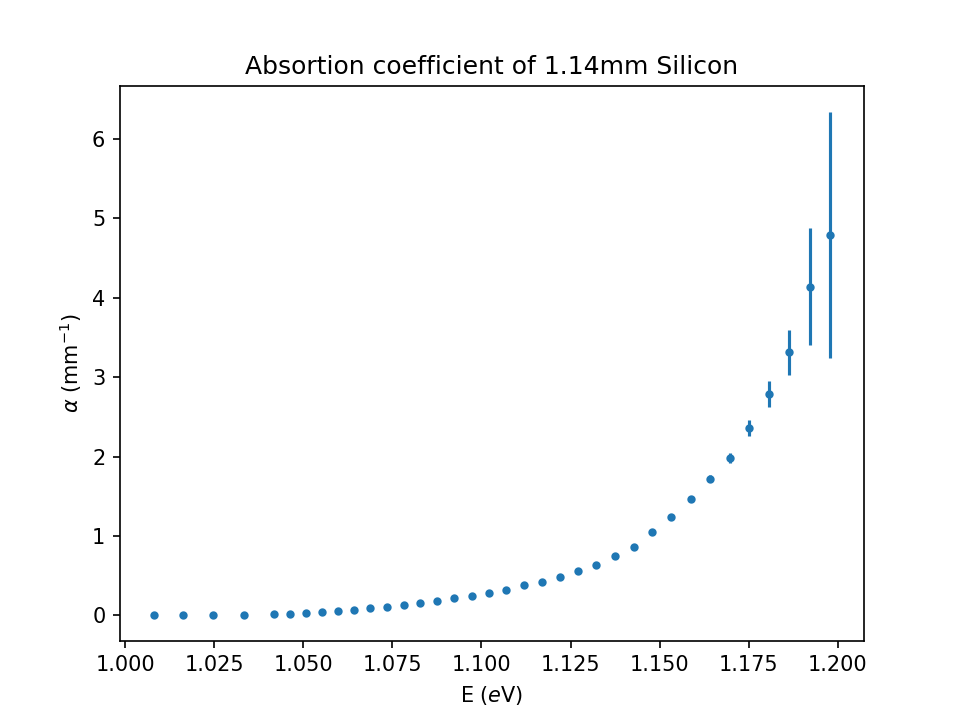

In [92]:
fig114 = plt.figure()
ax = fig114.add_subplot(111)
ax.errorbar(E114, a114, da114, fmt='.')

ax.set_xlabel('E ($e$V)')
ax.set_ylabel('$\\alpha$ (mm$^{-1}$)')
ax.set_title('Absortion coefficient of 1.14mm Silicon')

plt.savefig('a114.png')

<IPython.core.display.Javascript object>


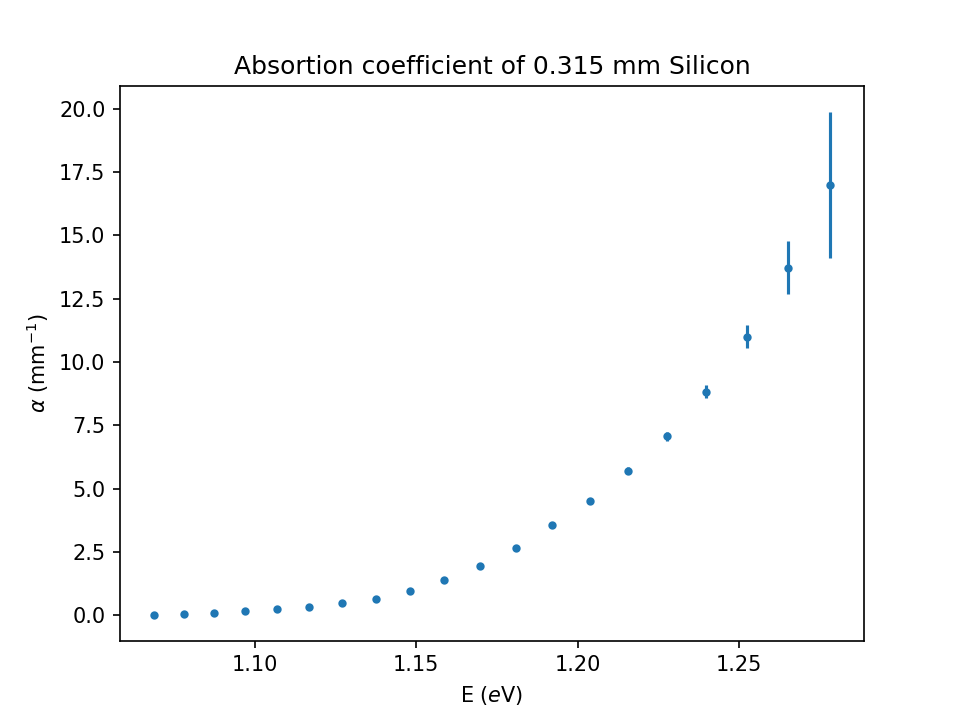

In [94]:
fig315 = plt.figure()
ax = fig315.add_subplot(111)
ax.errorbar(E315, a315, da315, fmt='.')

ax.set_xlabel('E ($e$V)')
ax.set_ylabel('$\\alpha$ (mm$^{-1}$)')
ax.set_title('Absortion coefficient of 0.315 mm Silicon')

plt.savefig('a315.png')

<IPython.core.display.Javascript object>


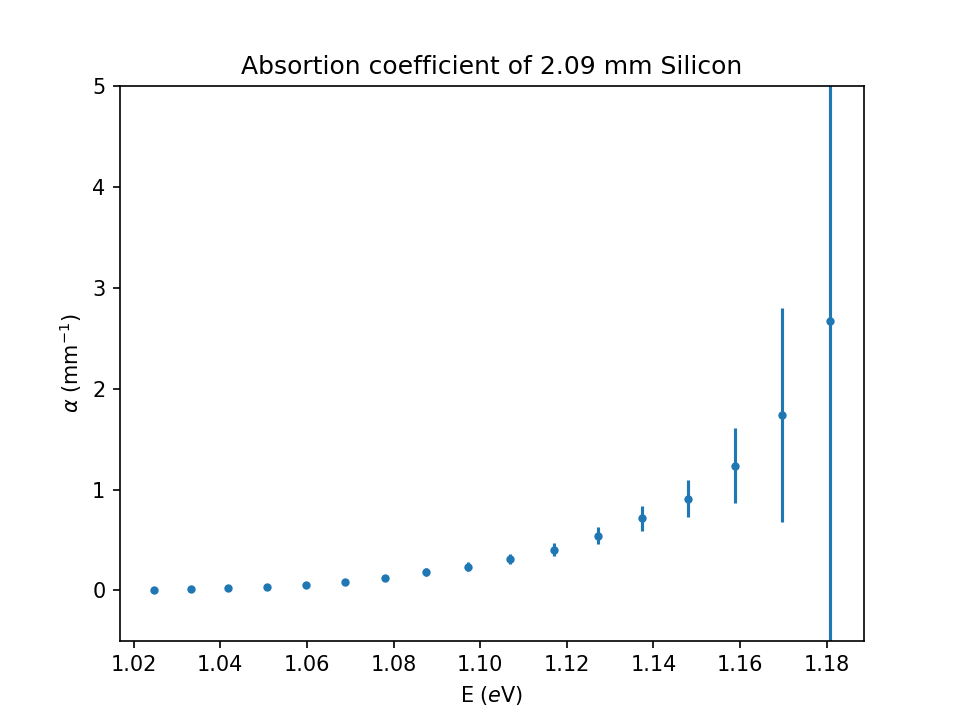

In [96]:
fig209 = plt.figure()
ax = fig209.add_subplot(111)
ax.errorbar(E209, a209, da209, fmt='.')

ax.set_xlabel('E ($e$V)')
ax.set_ylabel('$\\alpha$ (mm$^{-1}$)')
ax.set_title('Absortion coefficient of 2.09 mm Silicon')
ax.set_ylim(-.5, 5)

plt.savefig('a209.png')

<IPython.core.display.Javascript object>


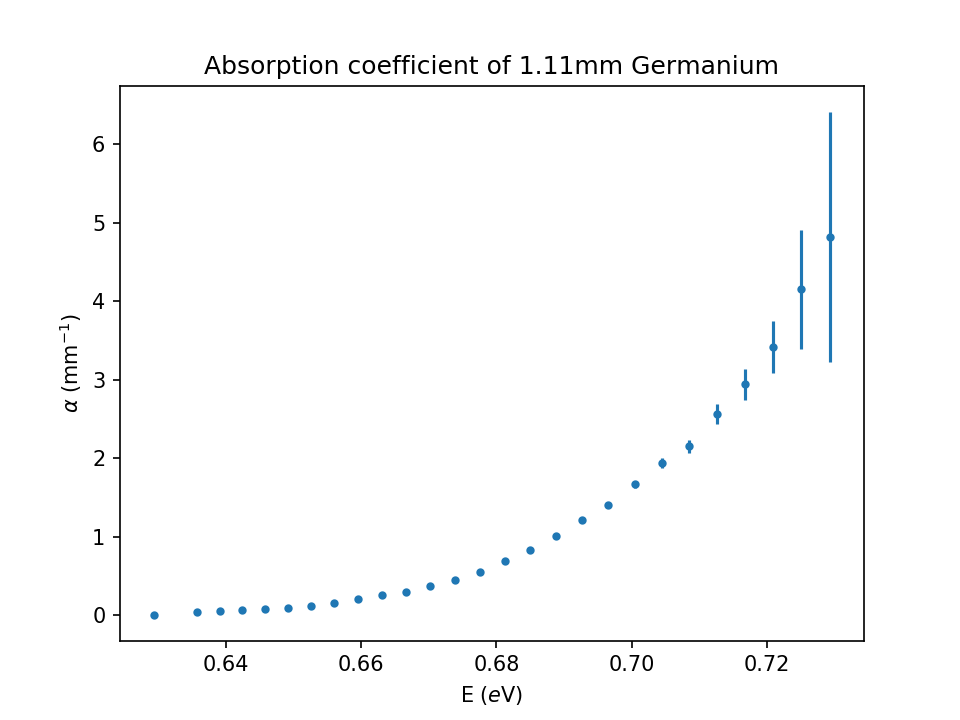

In [97]:
figGe = plt.figure()
ax = figGe.add_subplot(111)
ax.errorbar(EGe, aGe, daGe, fmt='.')

ax.set_xlabel('E ($e$V)')
ax.set_ylabel('$\\alpha$ (mm$^{-1}$)')
ax.set_title('Absorption coefficient of 1.11mm Germanium')

plt.savefig('aGe.pdf')

<IPython.core.display.Javascript object>


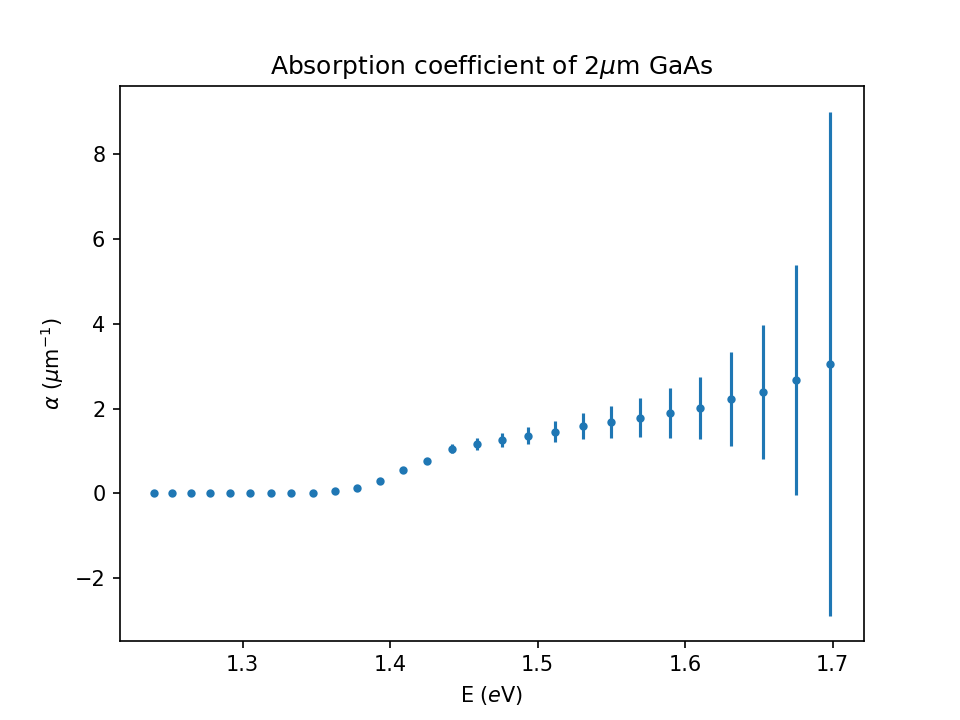

In [98]:
figGaAs = plt.figure()
ax = figGaAs.add_subplot(111)
ax.errorbar(EGaAs, aGaAs, daGaAs, fmt='.')

ax.set_xlabel('E ($e$V)')
ax.set_ylabel('$\\alpha$ ($\\mu$m$^{-1}$)')
ax.set_title('Absorption coefficient of 2$\\mu$m GaAs')

plt.savefig('aGaAs.pdf')

In [29]:
#GaAs is an indirect semiconductor. We create a linear fit for it
def line(p,x):
    return p[0]*(x-p[1])

def residual(p,x,y, err):
    return (line(p,x)-y)/err

In [34]:
a_sqrd = aGaAs**2
da_sqrd = 2*daGaAs*a_sqrd/aGaAs

##############################################################################

p0 = [1, 1.4]

pf, cov, info, mesg, success = optimize.leastsq(residual, p0, args=(EGaAs[11:], a_sqrd[11:],\
                                                                    da_sqrd[11:]),full_output=1)

if cov is None:
    print('Fit did not converge')
    print('Success code:', success)
    print(mesg)
else:
    chisq = sum(info['fvec']*info['fvec'])
    dof = len(EGaAs) - len(pf)
    pferr = [np.sqrt((cov[i,i])) for i in range(len(pf))]
    print('Converged with chi-squared', chisq)
    print('Number of degrees of freedom, dof =', dof)
    print('Reduced chi-squared ', chisq/dof)
    print('Inital guess values:')
    print('  p0 =', p0)
    print('Best fit values:')
    print('  pf =', pf)
    print('Uncertainties in the best fit values:')
    print('  pferr =', pferr)


Converged with chi-squared 3.67516619479
Number of degrees of freedom, dof = 26
Reduced chi-squared  0.141352545954
Inital guess values:
  p0 = [1, 1.4]
Best fit values:
  pf = [ 16.24556444   1.38770759]
Uncertainties in the best fit values:
  pferr = [1.4181613089356162, 0.0010387463096905483]


<IPython.core.display.Javascript object>


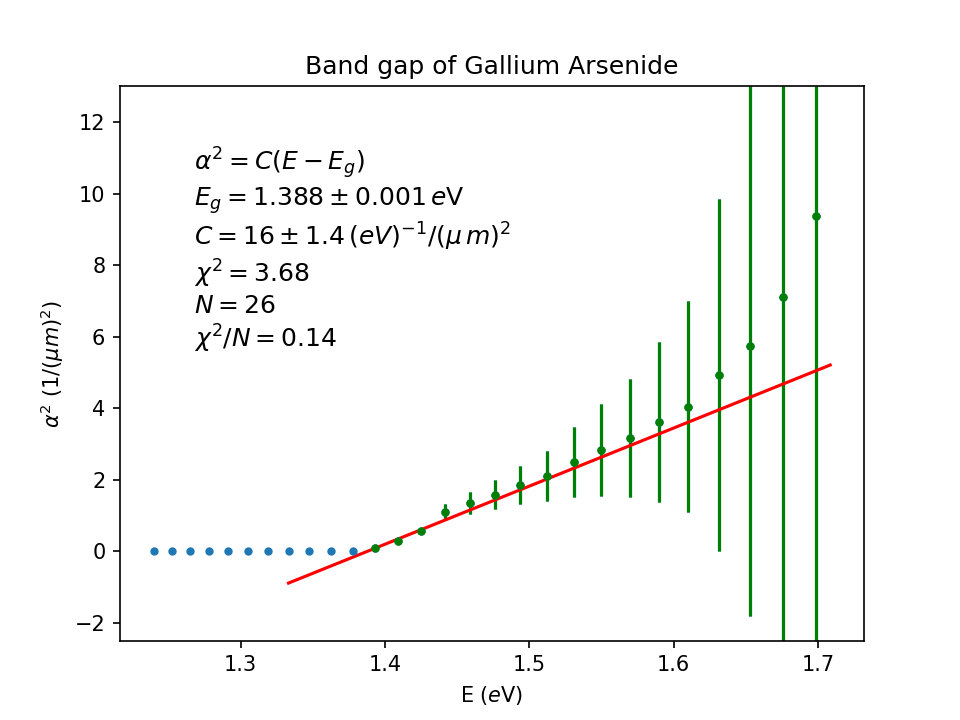

In [83]:
figfit = plt.figure()
ax= figfit.add_subplot(111)

X = np.linspace(EGaAs[7:].min(), EGaAs.max()+.01, 100)
ax.errorbar(EGaAs, a_sqrd, da_sqrd, fmt='.')
ax.errorbar(EGaAs[11:], a_sqrd[11:], da_sqrd[11:], fmt = 'g.')
ax.plot(X, line(pf, X), 'r')

ax.set_title('Band gap of Gallium Arsenide')
ax.set_ylabel('$\\alpha^2$ (1/$(\\mu m)^2$)')
ax.set_xlabel('E ($e$V)')
ax.set_ylim(-2.5, 13)

textfit = '$\\alpha^2 = C(E - E_g)$ \n'\
          '$E_g = %.3f \\pm %.3f\,e$V \n'\
          '$C = %.0f \\pm %.1f\,(eV)^{-1}/(\\mu\,m)^2$ \n' \
          '$\\chi^2 = %.2f$ \n' \
          '$N = %i$ \n'\
          '$\\chi^2/N = %.2f$' \
            % (pf[1], pferr[1], pf[0], pferr[0], chisq, dof, chisq/dof )


ax.text(0.1, 0.9, textfit, transform=ax.transAxes, fontsize=12,
         verticalalignment='top')

plt.savefig('gapGaAs.pdf')